In [1026]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data
import pandas_datareader as web
import eventstudy as es
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import norm
from numpy import sqrt, abs
from datetime import date, datetime, timedelta
import numpy as np
from statistics import NormalDist

In [1027]:
tickers2 = pd.read_csv("tickers2.csv")
tickers2 = tickers2.drop(["Unnamed: 4", "Unnamed: 5","Unnamed: 0"], axis=1)
tickers2 = pd.DataFrame(tickers2)
sectors = list(tickers2['Sector'].unique())
del sectors[-1]

sectors


['Basic Materials',
 'Communication Services',
 'Consumer Cyclical',
 'Consumer Defensive',
 'Energy',
 'Financial Services',
 'Healthcare',
 'Industrials',
 'Real Estate',
 'Technology',
 'Utilities']

In [1028]:
sectors[7]

'Industrials'

In [1029]:

tic = list(tickers2[tickers2['Sector']==sectors[2]]['Ticker'])
# tic.extend(['VGOV.L','^FTLC'])
tic

['ASC.L',
 'BOO.L',
 'GMR.L',
 'MUL.L',
 'VTU.L',
 'YNGA.L',
 'AML.L',
 'AO.L',
 'BDEV.L',
 'BKG.L',
 'BOWL.L',
 'BRBY.L',
 'BWNG.L',
 'BWY.L',
 'CARD.L',
 'CAR.L',
 'COA.L',
 'CPG.L',
 'CRST.L',
 'CSP.L',
 'DFS.L',
 'DNLM.L',
 'DOM.L',
 'DTY.L',
 'FSTA.L',
 'GAW.L',
 'GLE.L',
 'GYM.L',
 'HEAD.L',
 'HFD.L',
 'HWDN.L',
 'IHG.L',
 'INCH.L',
 'JD.L',
 'JDW.L',
 'KGF.L',
 'LOOK.L',
 'MAB.L',
 'MARS.L',
 'MER.L',
 'MKS.L',
 'MOTR.L',
 'MTC.L',
 'NXT.L',
 'OTB.L',
 'PDG.L',
 'PETS.L',
 'RBG.L',
 'RDW.L',
 'RNK.L',
 'RTN.L',
 'SCS.L',
 'SDRY.L',
 'SMDS.L',
 'SMWH.L',
 'SPO.L',
 'SSPG.L',
 'STU.L',
 'TED.L',
 'TIFS.L',
 'TPT.L',
 'TRN.L',
 'TW.L',
 'UPGS.L',
 'WOSG.L',
 'WRKS.L',
 'WTB.L',
 'XPS.L']

In [1030]:
le = 43
ue = 130
event_date = datetime(2016,6,24)
start = event_date - timedelta(days=le)
start = start.strftime('%Y-%m-%d')
end = event_date + timedelta(days=ue)
end = end.strftime('%Y-%m-%d')
start_date = "2015-01-01"
end_date = (event_date - timedelta(days=le+1)).strftime('%Y-%m-%d')



In [1031]:
rf = yf.download('VGOV.L', start=start_date, end=end_date, interval='1d')['Close']
market = yf.download('^FTLC', start=start_date, end=end_date, interval='1d')['Close']



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [1032]:
rf = pd.DataFrame(rf).pct_change()[1:]
market = pd.DataFrame(market).pct_change()[1:]


In [1033]:
rf.columns = ['rf']
market.columns = ['market']
market

,market
Date,
2015-01-02,-0.002670
2015-01-05,-0.018072
2015-01-06,-0.008066
2015-01-07,0.007760
2015-01-08,0.022020
...,...
2016-05-04,-0.010571
2016-05-05,0.000734
2016-05-06,0.000997


In [1034]:
# def estimation_period():

returns = yf.download(tic, start_date, end_date, interval = "1d")["Close"]
# market_returns = web.get_data_yahoo("^IXIC", start_date, end_date, interval = 'd').pct_change()[1:]['Close']
# risk_free_returns = web.get_data_yahoo('^TNX', start_date, end_date, interval = 'd').pct_change()[1:]['Close']
# returns = pd.DataFrame(returns).pct_change()[1:]
# returns = returns.drop("AAF.L", axis=1).pct_change()[1:]
# returns = returns.pct_change()[1:]
rows = returns.shape[0]
returns.index = pd.to_datetime(returns.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
returns


[*********************100%***********************]  68 of 68 completed

9 Failed downloads:
- WRKS.L: Data doesn't exist for startDate = 1420066800, endDate = 1462917600
- MOTR.L: Data doesn't exist for startDate = 1420066800, endDate = 1462917600
- TIFS.L: Data doesn't exist for startDate = 1420066800, endDate = 1462917600
- TRN.L: Data doesn't exist for startDate = 1420066800, endDate = 1462917600
- XPS.L: Data doesn't exist for startDate = 1420066800, endDate = 1462917600
- BOWL.L: Data doesn't exist for startDate = 1420066800, endDate = 1462917600
- UPGS.L: Data doesn't exist for startDate = 1420066800, endDate = 1462917600
- AML.L: Data doesn't exist for startDate = 1420066800, endDate = 1462917600
- WOSG.L: Data doesn't exist for startDate = 1420066800, endDate = 1462917600


,AML.L,AO.L,ASC.L,BDEV.L,BKG.L,BOO.L,BOWL.L,BRBY.L,BWNG.L,BWY.L,CAR.L,CARD.L,COA.L,CPG.L,CRST.L,CSP.L,DFS.L,DNLM.L,DOM.L,DTY.L,FSTA.L,GAW.L,GLE.L,GMR.L,GYM.L,HEAD.L,HFD.L,HWDN.L,IHG.L,INCH.L,JD.L,JDW.L,KGF.L,LOOK.L,MAB.L,MARS.L,MER.L,MKS.L,MOTR.L,MTC.L,MUL.L,NXT.L,OTB.L,PDG.L,PETS.L,RBG.L,RDW.L,RNK.L,RTN.L,SCS.L,SDRY.L,SMDS.L,SMWH.L,SPO.L,SSPG.L,STU.L,TED.L,TIFS.L,TPT.L,TRN.L,TW.L,UPGS.L,VTU.L,WOSG.L,WRKS.L,WTB.L,XPS.L,YNGA.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31,NaN,280.200012,2576.0,471.000000,2480.0,39.50,NaN,1636.0,378.470398,1939.0,89.50,283.100006,21.00,1145.040527,388.399994,NaN,NaN,932.0,234.166595,1909.0,935.00,520.000,357.0,34.250,NaN,440.00,469.600006,403.000000,3423.579590,725.0,20.299999,820.0,340.500000,130.000000,346.384613,97.000000,375.50,454.562714,NaN,145.629303,825.00,6820.0,NaN,32.500000,202.199997,NaN,310.274902,161.649994,482.105103,NaN,890.0,299.603699,1351.0,63.00,264.943390,11840.00,1808.489014,NaN,113.50,NaN,137.800003,NaN,59.25,NaN,NaN,4098.015625,NaN,1027.5
2015-01-02,NaN,285.600006,2561.0,460.500000,2465.0,39.25,NaN,1624.0,366.920807,1917.0,88.00,289.500000,21.25,1140.880493,388.600006,NaN,NaN,923.5,233.166595,1924.0,935.25,503.000,360.5,34.500,NaN,430.25,465.899994,402.399994,3418.302490,713.0,20.320000,812.5,336.299988,133.750000,340.882202,97.000000,387.00,452.948700,NaN,146.461395,845.00,6755.0,NaN,32.750000,200.800003,NaN,306.914886,160.000000,481.374603,NaN,851.5,300.347992,1346.0,67.00,263.147095,11840.00,1791.389404,NaN,117.00,NaN,134.899994,NaN,58.25,NaN,NaN,4052.481934,NaN,1035.0
2015-01-05,NaN,281.299988,2484.0,457.000000,2465.0,39.25,NaN,1607.0,363.959412,1914.0,93.00,289.399994,21.50,1119.040527,385.000000,NaN,NaN,898.5,233.833298,1914.0,920.00,495.000,360.0,33.000,NaN,432.50,464.299988,400.500000,3398.512939,710.0,20.280001,812.5,328.100006,134.750000,341.243011,97.000000,384.25,433.676300,NaN,143.132797,885.00,6740.0,NaN,32.500000,200.000000,NaN,301.244904,160.000000,482.470306,NaN,844.0,297.649689,1355.0,63.50,260.363007,11840.00,1834.545654,NaN,116.00,NaN,133.800003,NaN,59.00,NaN,NaN,4027.567383,NaN,1050.0
2015-01-06,NaN,272.100006,2320.0,447.600006,2440.0,38.25,NaN,1602.0,356.753204,1888.0,91.25,286.299988,21.50,1097.200439,379.600006,NaN,NaN,872.5,226.333298,1895.0,930.00,495.000,364.0,33.500,NaN,423.50,458.200012,389.100006,3341.783203,697.0,18.879999,788.0,316.799988,135.000000,356.307098,97.000000,381.75,431.397797,NaN,144.589096,880.00,6740.0,NaN,32.000000,200.000000,NaN,292.319885,157.300003,469.687195,NaN,815.5,294.486206,1345.0,64.00,244.735794,11840.00,1860.602173,NaN,112.00,NaN,131.100006,NaN,58.75,NaN,NaN,3955.401123,NaN,1050.0
2015-01-07,NaN,271.200012,2167.0,453.399994,2446.0,22.00,NaN,1626.0,359.023712,1916.0,92.50,282.200012,21.50,1102.400513,382.000000,NaN,NaN,855.0,228.333298,1887.0,921.00,496.500,364.0,33.500,NaN,430.75,462.500000,392.200012,3414.344482,699.0,19.032000,789.5,319.100006,134.750000,359.013306,97.000000,384.50,439.752411,NaN,145.837296,860.25,6850.0,NaN,32.500000,201.300003,NaN,294.524902,156.000000,487.218292,NaN,792.5,295.044495,1341.0,63.50,237.101898,11840.00,1840.245483,NaN,113.50,NaN,132.399994,NaN,58.75,NaN,NaN,3986.329590,NaN,1035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-04,NaN,180.000000,3600.0,527.000000,2936.0,48.00,NaN,1179.0,257.150604,2456.0,149.75,367.100006,30.00,1268.800659,525.000000,235.0,300.000000,891.0,316.500000,2503.0,1084.00,480.500,535.0,19.750,268.0,477.50,415.200012,496.200012,3564.744385,678.5,50.320000,700.0,361.600006,142.399994,243.551697,145.199997,406.50,392.093506,NaN,91.954498,1022.00,5150.0,283.0,35.299999,246.800003,152.434998,397.004913,243.600006,201.315399,192.5,1245.0,354.313904,1684.0,75.00,258.297302,171.00,1924.929321,

In [1035]:
# rf = pd.read_csv("10y.csv")
# rf.index = list(rf['Date'])
# rf

In [1036]:
pd.set_option("display.max_rows", 60)
pd.set_option("display.max_columns", None)

In [1037]:
isn = dict(returns.isnull().mean().transpose())
for sym, val in isn.items():
    if returns.shape[0]==rows:
        if val>0:
            returns.drop([sym],axis=1,inplace=True)
    
    # print(sym, val)
returns

,AO.L,ASC.L,BDEV.L,BKG.L,BOO.L,BRBY.L,BWNG.L,BWY.L,CAR.L,CARD.L,COA.L,CPG.L,CRST.L,DNLM.L,DOM.L,DTY.L,FSTA.L,GAW.L,GLE.L,GMR.L,HEAD.L,HFD.L,HWDN.L,IHG.L,INCH.L,JD.L,JDW.L,KGF.L,LOOK.L,MAB.L,MARS.L,MER.L,MKS.L,MTC.L,MUL.L,NXT.L,PDG.L,PETS.L,RDW.L,RNK.L,RTN.L,SDRY.L,SMDS.L,SMWH.L,SPO.L,SSPG.L,STU.L,TED.L,TPT.L,TW.L,VTU.L,WTB.L,YNGA.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31,280.200012,2576.0,471.000000,2480.0,39.50,1636.0,378.470398,1939.0,89.50,283.100006,21.00,1145.040527,388.399994,932.0,234.166595,1909.0,935.00,520.000,357.0,34.250,440.00,469.600006,403.000000,3423.579590,725.0,20.299999,820.0,340.500000,130.000000,346.384613,97.000000,375.50,454.562714,145.629303,825.00,6820.0,32.500000,202.199997,310.274902,161.649994,482.105103,890.0,299.603699,1351.0,63.00,264.943390,11840.00,1808.489014,113.50,137.800003,59.25,4098.015625,1027.5
2015-01-02,285.600006,2561.0,460.500000,2465.0,39.25,1624.0,366.920807,1917.0,88.00,289.500000,21.25,1140.880493,388.600006,923.5,233.166595,1924.0,935.25,503.000,360.5,34.500,430.25,465.899994,402.399994,3418.302490,713.0,20.320000,812.5,336.299988,133.750000,340.882202,97.000000,387.00,452.948700,146.461395,845.00,6755.0,32.750000,200.800003,306.914886,160.000000,481.374603,851.5,300.347992,1346.0,67.00,263.147095,11840.00,1791.389404,117.00,134.899994,58.25,4052.481934,1035.0
2015-01-05,281.299988,2484.0,457.000000,2465.0,39.25,1607.0,363.959412,1914.0,93.00,289.399994,21.50,1119.040527,385.000000,898.5,233.833298,1914.0,920.00,495.000,360.0,33.000,432.50,464.299988,400.500000,3398.512939,710.0,20.280001,812.5,328.100006,134.750000,341.243011,97.000000,384.25,433.676300,143.132797,885.00,6740.0,32.500000,200.000000,301.244904,160.000000,482.470306,844.0,297.649689,1355.0,63.50,260.363007,11840.00,1834.545654,116.00,133.800003,59.00,4027.567383,1050.0
2015-01-06,272.100006,2320.0,447.600006,2440.0,38.25,1602.0,356.753204,1888.0,91.25,286.299988,21.50,1097.200439,379.600006,872.5,226.333298,1895.0,930.00,495.000,364.0,33.500,423.50,458.200012,389.100006,3341.783203,697.0,18.879999,788.0,316.799988,135.000000,356.307098,97.000000,381.75,431.397797,144.589096,880.00,6740.0,32.000000,200.000000,292.319885,157.300003,469.687195,815.5,294.486206,1345.0,64.00,244.735794,11840.00,1860.602173,112.00,131.100006,58.75,3955.401123,1050.0
2015-01-07,271.200012,2167.0,453.399994,2446.0,22.00,1626.0,359.023712,1916.0,92.50,282.200012,21.50,1102.400513,382.000000,855.0,228.333298,1887.0,921.00,496.500,364.0,33.500,430.75,462.500000,392.200012,3414.344482,699.0,19.032000,789.5,319.100006,134.750000,359.013306,97.000000,384.50,439.752411,145.837296,860.25,6850.0,32.500000,201.300003,294.524902,156.000000,487.218292,792.5,295.044495,1341.0,63.50,237.101898,11840.00,1840.245483,113.50,132.399994,58.75,3986.329590,1035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-04,180.000000,3600.0,527.000000,2936.0,48.00,1179.0,257.150604,2456.0,149.75,367.100006,30.00,1268.800659,525.000000,891.0,316.500000,2503.0,1084.00,480.500,535.0,19.750,477.50,415.200012,496.200012,3564.744385,678.5,50.320000,700.0,361.600006,142.399994,243.551697,145.199997,406.50,392.093506,91.954498,1022.00,5150.0,35.299999,246.800003,397.004913,243.600006,201.315399,1245.0,354.313904,1684.0,75.00,258.297302,171.00,1924.929321,137.25,182.899994,58.50,3305.045166,1209.5
2016-05-05,175.800003,3606.0,522.000000,2897.0,47.75,1178.0,254.189102,2444.0,146.75,367.000000,30.00,1270.880615,527.500000,897.5,319.000000,2517.0,1077.00,475.250,525.0,20.000,476.50,415.200012,495.399994,3556.828613,668.5,50.599998,715.0,359.299988,141.300003,244.183105,144.399994,404.00,392.852997,90.914299,1000.00,5280.0,35.099998,242.899994,397.004913,242.100006,204.383301,1222.0,354.313904,1688.0,74.25,257.040009,172.25,1917.600952,137.50,181.500000,59.00,3286.144531,1175.0


In [1038]:
returns = returns.pct_change()[1:]
returns


,AO.L,ASC.L,BDEV.L,BKG.L,BOO.L,BRBY.L,BWNG.L,BWY.L,CAR.L,CARD.L,COA.L,CPG.L,CRST.L,DNLM.L,DOM.L,DTY.L,FSTA.L,GAW.L,GLE.L,GMR.L,HEAD.L,HFD.L,HWDN.L,IHG.L,INCH.L,JD.L,JDW.L,KGF.L,LOOK.L,MAB.L,MARS.L,MER.L,MKS.L,MTC.L,MUL.L,NXT.L,PDG.L,PETS.L,RDW.L,RNK.L,RTN.L,SDRY.L,SMDS.L,SMWH.L,SPO.L,SSPG.L,STU.L,TED.L,TPT.L,TW.L,VTU.L,WTB.L,YNGA.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.019272,-0.005823,-0.022293,-0.006048,-0.006329,-0.007335,-0.030516,-0.011346,-0.016760,0.022607,0.011905,-0.003633,0.000515,-0.009120,-0.004270,0.007858,0.000267,-0.032692,0.009804,0.007299,-0.022159,-0.007879,-0.001489,-0.001541,-0.016552,0.000985,-0.009146,-0.012335,0.028846,-0.015885,0.000000,0.030626,-0.003551,0.005714,0.024242,-0.009531,0.007692,-0.006924,-0.010829,-0.010207,-0.001515,-0.043258,0.002484,-0.003701,0.063492,-0.006780,0.000000,-0.009455,0.030837,-0.021045,-0.016878,-0.011111,0.007299
2015-01-05,-0.015056,-0.030066,-0.007600,0.000000,0.000000,-0.010468,-0.008071,-0.001565,0.056818,-0.000345,0.011765,-0.019143,-0.009264,-0.027071,0.002859,-0.005198,-0.016306,-0.015905,-0.001387,-0.043478,0.005230,-0.003434,-0.004722,-0.005789,-0.004208,-0.001968,0.000000,-0.024383,0.007477,0.001058,0.000000,-0.007106,-0.042549,-0.022727,0.047337,-0.002221,-0.007634,-0.003984,-0.018474,0.000000,0.002276,-0.008808,-0.008984,0.006686,-0.052239,-0.010580,0.000000,0.024091,-0.008547,-0.008154,0.012876,-0.006148,0.014493
2015-01-06,-0.032705,-0.066023,-0.020569,-0.010142,-0.025478,-0.003111,-0.019799,-0.013584,-0.018817,-0.010712,0.000000,-0.019517,-0.014026,-0.028937,-0.032074,-0.009927,0.010870,0.000000,0.011111,0.015152,-0.020809,-0.013138,-0.028464,-0.016693,-0.018310,-0.069034,-0.030154,-0.034441,0.001855,0.044145,0.000000,-0.006506,-0.005254,0.010174,-0.005650,0.000000,-0.015385,0.000000,-0.029627,-0.016875,-0.026495,-0.033768,-0.010628,-0.007380,0.007874,-0.060021,0.000000,0.014203,-0.034483,-0.020179,-0.004237,-0.017918,0.000000
2015-01-07,-0.003308,-0.065948,0.012958,0.002459,-0.424837,0.014981,0.006364,0.014831,0.013699,-0.014321,0.000000,0.004739,0.006322,-0.020057,0.008837,-0.004222,-0.009677,0.003030,0.000000,0.000000,0.017119,0.009385,0.007967,0.021713,0.002869,0.008051,0.001904,0.007260,-0.001852,0.007595,0.000000,0.007204,0.019366,0.008633,-0.022443,0.016320,0.015625,0.006500,0.007543,-0.008264,0.037325,-0.028204,0.001896,-0.002974,-0.007812,-0.031192,0.000000,-0.010941,0.013393,0.009916,0.000000,0.007819,-0.014286
2015-01-08,-0.062316,0.072912,0.002867,0.001635,0.045455,0.015375,0.030244,-0.004175,-0.010811,0.027640,0.011628,0.029245,0.007330,0.017544,0.014598,0.000530,-0.001086,-0.009063,0.000000,0.000000,-0.006965,-0.084757,0.048445,0.017774,0.013591,0.019336,0.016466,0.011282,0.016698,0.051759,0.000000,0.001300,-0.035190,-0.001426,-0.017727,0.008029,0.046154,0.002484,0.019608,0.010897,0.026986,-0.012618,0.030274,-0.009694,-0.007874,0.022727,0.000000,0.054867,-0.007709,0.003021,-0.004255,0.020259,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-04,0.000000,-0.008811,-0.001894,-0.005083,0.026738,-0.005063,-0.015123,0.000407,0.006723,0.002731,-0.008264,0.003289,-0.002849,0.006780,0.017140,0.012540,0.028463,-0.008767,-0.044643,-0.048193,-0.015971,-0.013073,-0.003014,0.002970,0.002216,0.005595,0.030169,-0.003308,0.007072,0.025057,0.013259,0.011194,-0.016667,-0.069474,0.033367,0.034552,0.032164,0.009407,-0.019196,0.014577,0.007310,0.034053,0.004749,-0.004140,0.190476,0.008415,0.005882,-0.010879,0.005495,-0.004897,-0.008475,-0.001039,0.010443
2016-05-05,-0.023333,0.001667,-0.009488,-0.013283,-0.005208,-0.000848,-0.011517,-0.004886,-0.020033,-0.000272,0.000000,0.001639,0.004762,0.007295,0.007899,0.005593,-0.006458,-0.010926,-0.018692,0.012658,-0.002094,0.000000,-0.001612,-0.002221,-0.014738,0.005564,0.021429,-0.006361,-0.007725,0.002593,-0.005

In [1039]:
for i in range(len(returns.columns[:])):
    returns[returns.columns[i]] = returns[returns.columns[i]] - rf['rf'].mean()
returns.dropna()

,AO.L,ASC.L,BDEV.L,BKG.L,BOO.L,BRBY.L,BWNG.L,BWY.L,CAR.L,CARD.L,COA.L,CPG.L,CRST.L,DNLM.L,DOM.L,DTY.L,FSTA.L,GAW.L,GLE.L,GMR.L,HEAD.L,HFD.L,HWDN.L,IHG.L,INCH.L,JD.L,JDW.L,KGF.L,LOOK.L,MAB.L,MARS.L,MER.L,MKS.L,MTC.L,MUL.L,NXT.L,PDG.L,PETS.L,RDW.L,RNK.L,RTN.L,SDRY.L,SMDS.L,SMWH.L,SPO.L,SSPG.L,STU.L,TED.L,TPT.L,TW.L,VTU.L,WTB.L,YNGA.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.019159,-0.005936,-0.022406,-0.006161,-0.006442,-0.007448,-0.030630,-0.011459,-0.016873,0.022494,0.011792,-0.003746,0.000402,-0.009233,-0.004384,0.007744,0.000154,-0.032805,0.009691,0.007186,-0.022272,-0.007992,-0.001602,-0.001654,-0.016665,0.000872,-0.009259,-0.012448,0.028733,-0.015998,-0.000113,0.030513,-0.003664,0.005601,0.024129,-0.009644,0.007579,-0.007037,-0.010942,-0.010320,-0.001628,-0.043372,0.002371,-0.003814,0.063379,-0.006893,-0.000113,-0.009568,0.030724,-0.021158,-0.016991,-0.011224,0.007186
2015-01-05,-0.015169,-0.030179,-0.007714,-0.000113,-0.000113,-0.010581,-0.008184,-0.001678,0.056705,-0.000459,0.011652,-0.019256,-0.009377,-0.027184,0.002746,-0.005311,-0.016419,-0.016018,-0.001500,-0.043591,0.005116,-0.003547,-0.004835,-0.005902,-0.004321,-0.002082,-0.000113,-0.024496,0.007364,0.000945,-0.000113,-0.007219,-0.042662,-0.022840,0.047224,-0.002334,-0.007747,-0.004097,-0.018587,-0.000113,0.002163,-0.008921,-0.009097,0.006573,-0.052352,-0.010693,-0.000113,0.023978,-0.008660,-0.008267,0.012762,-0.006261,0.014380
2015-01-06,-0.032818,-0.066136,-0.020682,-0.010255,-0.025591,-0.003224,-0.019913,-0.013697,-0.018930,-0.010825,-0.000113,-0.019630,-0.014139,-0.029050,-0.032187,-0.010040,0.010756,-0.000113,0.010998,0.015038,-0.020922,-0.013251,-0.028577,-0.016806,-0.018423,-0.069147,-0.030267,-0.034554,0.001742,0.044032,-0.000113,-0.006619,-0.005367,0.010061,-0.005763,-0.000113,-0.015498,-0.000113,-0.029740,-0.016988,-0.026608,-0.033881,-0.010741,-0.007493,0.007761,-0.060134,-0.000113,0.014090,-0.034596,-0.020292,-0.004350,-0.018031,-0.000113
2015-01-07,-0.003421,-0.066061,0.012845,0.002346,-0.424950,0.014868,0.006251,0.014717,0.013586,-0.014434,-0.000113,0.004626,0.006209,-0.020170,0.008723,-0.004335,-0.009791,0.002917,-0.000113,-0.000113,0.017006,0.009271,0.007854,0.021600,0.002756,0.007938,0.001790,0.007147,-0.001965,0.007482,-0.000113,0.007091,0.019253,0.008520,-0.022556,0.016207,0.015512,0.006387,0.007430,-0.008378,0.037212,-0.028317,0.001783,-0.003087,-0.007926,-0.031305,-0.000113,-0.011054,0.013280,0.009803,-0.000113,0.007706,-0.014399
2015-01-08,-0.062429,0.072799,0.002754,0.001522,0.045341,0.015262,0.030131,-0.004288,-0.010924,0.027527,0.011515,0.029132,0.007217,0.017431,0.014485,0.000417,-0.001199,-0.009177,-0.000113,-0.000113,-0.007078,-0.084870,0.048332,0.017661,0.013478,0.019223,0.016353,0.011169,0.016585,0.051646,-0.000113,0.001187,-0.035303,-0.001539,-0.017840,0.007916,0.046041,0.002371,0.019495,0.010784,0.026873,-0.012731,0.030161,-0.009807,-0.007987,0.022614,-0.000113,0.054754,-0.007822,0.002908,-0.004368,0.020146,-0.000113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-04,-0.000113,-0.008924,-0.002007,-0.005196,0.026625,-0.005176,-0.015236,0.000294,0.006610,0.002618,-0.008378,0.003176,-0.002962,0.006667,0.017027,0.012427,0.028350,-0.008880,-0.044756,-0.048306,-0.016084,-0.013187,-0.003127,0.002856,0.002103,0.005482,0.030056,-0.003421,0.006959,0.024944,0.013146,0.011081,-0.016780,-0.069587,0.033254,0.034439,0.032051,0.009294,-0.019309,0.014464,0.007197,0.033940,0.004636,-0.004253,0.190363,0.008302,0.005769,-0.010992,0.005381,-0.005010,-0.008588,-0.001152,0.010330
2016-05-05,-0.023446,0.001554,-0.009601,-0.013396,-0.005321,-0.000961,-0.011630,-0.004999,-0.020146,-0.000386,-0.000113,0.001526,0.004649,0.007182,0.007786,0.005480,-0.006571,-0.011039,-0.018805,0.012545,-0.002207,-0.000113,-0.001725,-0.002334,-0.014851,0.005451,0.021315,-0.006

In [1040]:
returns = returns.dropna()
x = market['market']
x_sm = sm.add_constant(x)
values = pd.DataFrame(index=['0','1'], columns=list(returns.columns)[:])

In [1041]:

for i in range(len(returns.columns[:])):
    returns = returns.dropna()
    y = list(returns[returns.columns[i]])
    model = sm.OLS(y,x_sm)
    results = model.fit()
    values.iat[0,i] = results.params[0]
    values.iat[1,i] = results.params[1]
  

In [1042]:
values

,AO.L,ASC.L,BDEV.L,BKG.L,BOO.L,BRBY.L,BWNG.L,BWY.L,CAR.L,CARD.L,COA.L,CPG.L,CRST.L,DNLM.L,DOM.L,DTY.L,FSTA.L,GAW.L,GLE.L,GMR.L,HEAD.L,HFD.L,HWDN.L,IHG.L,INCH.L,JD.L,JDW.L,KGF.L,LOOK.L,MAB.L,MARS.L,MER.L,MKS.L,MTC.L,MUL.L,NXT.L,PDG.L,PETS.L,RDW.L,RNK.L,RTN.L,SDRY.L,SMDS.L,SMWH.L,SPO.L,SSPG.L,STU.L,TED.L,TPT.L,TW.L,VTU.L,WTB.L,YNGA.L
0,-0.000988,0.001504,0.000459,0.000667,0.001269,-0.000774,-0.001079,0.000796,0.001973,0.000801,0.001033,0.000421,0.001069,-0.000013,0.001074,0.000836,0.000518,-0.000185,0.001199,-0.001157,0.000255,-0.000266,0.000641,-0.000213,-0.00011,0.00273,-0.000419,0.000264,0.000204,-0.000896,0.001506,0.000233,-0.000333,-0.001143,0.000595,-0.00067,0.000355,0.00064,0.000891,0.001154,-0.002094,0.001245,0.000598,0.000664,0.000614,-0.000005,-0.003725,0.00029,0.000567,0.000913,0.0001,-0.000511,0.000501
1,0.302957,1.215129,0.90982,0.869394,0.619933,1.167576,0.558053,0.717823,0.317609,0.467474,0.160596,0.714276,0.887046,0.665628,0.58447,0.466823,0.065805,0.110038,0.27672,0.495846,0.210304,0.571449,0.702736,1.022452,0.820939,0.447703,0.303101,0.807892,0.615197,0.730818,0.534457,0.387174,0.83699,0.317954,-0.074309,0.670678,0.755361,0.610141,0.776671,0.271975,0.663607,0.43623,0.987437,0.532343,0.072952,0.546181,-0.437811,0.53993,0.202412,0.931953,0.270847,0.814463,-0.091551


In [1043]:
ls = list(returns.columns)
ls.append('^FTLC')
event = yf.download(ls,start, end, interval='1d').pct_change()[1:]['Close']
# if event.shape[0]%2==0:
ix = np.arange(-int(event.index.get_loc('2016-06-24')),int(int(event.shape[0] - event.index.get_loc('2016-06-24'))))
event.index = ix

event



[*********************100%***********************]  54 of 54 completed


,AO.L,ASC.L,BDEV.L,BKG.L,BOO.L,BRBY.L,BWNG.L,BWY.L,CAR.L,CARD.L,COA.L,CPG.L,CRST.L,DNLM.L,DOM.L,DTY.L,FSTA.L,GAW.L,GLE.L,GMR.L,HEAD.L,HFD.L,HWDN.L,IHG.L,INCH.L,JD.L,JDW.L,KGF.L,LOOK.L,MAB.L,MARS.L,MER.L,MKS.L,MTC.L,MUL.L,NXT.L,PDG.L,PETS.L,RDW.L,RNK.L,RTN.L,SDRY.L,SMDS.L,SMWH.L,SPO.L,SSPG.L,STU.L,TED.L,TPT.L,TW.L,VTU.L,WTB.L,YNGA.L,^FTLC
-30,-0.026822,-0.052632,0.001908,0.006196,0.015228,-0.024808,-0.012124,0.015010,-0.011111,-0.001959,0.008475,0.015987,0.005731,0.012943,0.018916,-0.005213,-0.010101,0.004202,0.000000,0.025316,0.013616,-0.008413,-0.002043,-0.015135,-0.022644,-0.007918,0.002825,-0.014325,0.013100,-0.020044,0.004129,0.003085,0.014833,0.030905,-0.007229,-0.015933,-0.008312,-0.011378,0.002099,0.044650,0.020718,0.115079,-0.006759,-0.002998,-0.013333,-0.001715,-0.042254,-0.000852,0.003738,0.012249,0.004329,-0.001018,-0.005800,-0.008449
-29,0.000000,-0.005691,0.014286,0.006158,0.000000,-0.000877,-0.010580,-0.002798,0.000000,0.009254,0.000000,0.005507,-0.002849,0.020556,0.004516,-0.003628,0.018553,0.000000,0.001852,0.012346,0.004975,-0.004364,-0.008802,-0.012369,0.026906,0.005587,-0.009859,-0.002795,-0.058908,0.002975,-0.005483,-0.004305,0.005658,0.032120,0.002427,0.019048,0.013006,-0.006576,-0.005761,-0.016129,-0.023681,-0.004982,0.005496,0.004209,-0.023649,0.013402,0.000000,0.011087,0.003724,0.000550,0.000000,-0.002038,-0.008333,0.004554
-28,-0.023367,0.022895,0.010329,0.014961,-0.010000,0.003512,0.000000,0.016433,-0.017657,-0.004168,0.000000,0.001565,0.045714,-0.004899,0.004995,-0.010113,-0.030055,0.006276,-0.011091,0.024390,0.016832,0.008035,0.001239,-0.005693,0.021834,-0.004762,0.002134,0.002242,0.005343,0.002225,-0.000689,-0.032119,-0.003047,-0.024896,0.004843,0.000000,-0.015692,-0.010343,-0.000263,0.005738,0.053015,-0.025036,-0.000781,0.001796,0.017301,0.008817,0.000000,-0.000422,-0.040816,0.016493,-0.034483,0.004594,0.025210,0.002252
-27,0.042945,-0.046896,0.024164,0.024791,0.015152,0.000000,0.033362,0.027603,-0.006536,0.018136,0.000000,-0.007812,0.010929,0.004923,0.011928,0.012669,0.018779,0.012474,0.045794,-0.005952,-0.008763,0.021739,0.008251,-0.001908,0.007835,0.000000,0.017033,0.001119,0.059226,0.014429,0.035172,0.002553,0.010346,0.010639,-0.012048,0.001869,0.005217,0.012124,0.027397,0.000000,0.034551,0.006603,0.001042,0.006575,-0.008503,0.008403,0.042647,0.013080,0.001934,0.047053,-0.008929,0.018801,0.000000,0.003677
-26,0.000000,-0.022645,0.009074,0.000000,-0.004975,-0.027122,-0.001656,0.002686,-0.013158,0.018361,-0.025210,0.004724,0.009009,0.014698,0.006876,0.000807,0.007373,-0.002053,-0.011618,-0.041916,-0.008841,0.005437,0.002864,-0.000765,-0.002827,0.021531,0.001396,0.000559,0.031541,0.010941,0.017988,-0.024825,0.028857,0.000000,0.012195,0.007463,0.040369,0.015696,0.016154,-0.001630,0.011768,-0.004373,-0.009368,0.007126,-0.012007,0.033334,-0.012694,0.008746,0.003861,0.014979,0.022523,0.018953,-0.012295,0.000116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,-0.043653,-0.015534,-0.013877,-0.015044,0.012739,-0.002051,-0.024646,-0.014309,0.005988,-0.011407,0.016287,0.001362,-0.001960,-0.017431,-0.010914,-0.019471,-0.005882,-0.011735,0.000000,-0.006897,-0.013092,0.005243,-0.043915,0.004132,-0.006955,-0.000641,-0.022034,0.001957,0.007481,-0.032555,-0.018222,-0.002653,0.000898,-0.017391,-0.000449,-0.018099,0.027027,0.002812,-0.025483,-0.015287,-0.017081,-0.014674,0.013145,-0.009823,0.003623,-0.012266,0.019465,0.009020,0.000000,-0.006263,0.000000,-0.037471,0.000377,0.003193
87,-0.015015,-0.001711,0.014712,-0.002970,-0.002096,0.009589,0.007527,-0.002903,-0.059524,-0.010385,-0.032051,-0.006803,-0.003928,0.009198,-0.001491,-0.000749,-0.011834,-0.005937,-0.038889,0.013889,0.018878,-0.000290,-0.014436,-0.009180,0.001556,-0.006414,-0.006355,0.002791,-0.009901,0.000000,-0.007424,-0.025532,0.023624,-0.050885,0.006745,0.002119,0.043860,0.00000

In [1044]:
event.isna().values.any()
event


,AO.L,ASC.L,BDEV.L,BKG.L,BOO.L,BRBY.L,BWNG.L,BWY.L,CAR.L,CARD.L,COA.L,CPG.L,CRST.L,DNLM.L,DOM.L,DTY.L,FSTA.L,GAW.L,GLE.L,GMR.L,HEAD.L,HFD.L,HWDN.L,IHG.L,INCH.L,JD.L,JDW.L,KGF.L,LOOK.L,MAB.L,MARS.L,MER.L,MKS.L,MTC.L,MUL.L,NXT.L,PDG.L,PETS.L,RDW.L,RNK.L,RTN.L,SDRY.L,SMDS.L,SMWH.L,SPO.L,SSPG.L,STU.L,TED.L,TPT.L,TW.L,VTU.L,WTB.L,YNGA.L,^FTLC
-30,-0.026822,-0.052632,0.001908,0.006196,0.015228,-0.024808,-0.012124,0.015010,-0.011111,-0.001959,0.008475,0.015987,0.005731,0.012943,0.018916,-0.005213,-0.010101,0.004202,0.000000,0.025316,0.013616,-0.008413,-0.002043,-0.015135,-0.022644,-0.007918,0.002825,-0.014325,0.013100,-0.020044,0.004129,0.003085,0.014833,0.030905,-0.007229,-0.015933,-0.008312,-0.011378,0.002099,0.044650,0.020718,0.115079,-0.006759,-0.002998,-0.013333,-0.001715,-0.042254,-0.000852,0.003738,0.012249,0.004329,-0.001018,-0.005800,-0.008449
-29,0.000000,-0.005691,0.014286,0.006158,0.000000,-0.000877,-0.010580,-0.002798,0.000000,0.009254,0.000000,0.005507,-0.002849,0.020556,0.004516,-0.003628,0.018553,0.000000,0.001852,0.012346,0.004975,-0.004364,-0.008802,-0.012369,0.026906,0.005587,-0.009859,-0.002795,-0.058908,0.002975,-0.005483,-0.004305,0.005658,0.032120,0.002427,0.019048,0.013006,-0.006576,-0.005761,-0.016129,-0.023681,-0.004982,0.005496,0.004209,-0.023649,0.013402,0.000000,0.011087,0.003724,0.000550,0.000000,-0.002038,-0.008333,0.004554
-28,-0.023367,0.022895,0.010329,0.014961,-0.010000,0.003512,0.000000,0.016433,-0.017657,-0.004168,0.000000,0.001565,0.045714,-0.004899,0.004995,-0.010113,-0.030055,0.006276,-0.011091,0.024390,0.016832,0.008035,0.001239,-0.005693,0.021834,-0.004762,0.002134,0.002242,0.005343,0.002225,-0.000689,-0.032119,-0.003047,-0.024896,0.004843,0.000000,-0.015692,-0.010343,-0.000263,0.005738,0.053015,-0.025036,-0.000781,0.001796,0.017301,0.008817,0.000000,-0.000422,-0.040816,0.016493,-0.034483,0.004594,0.025210,0.002252
-27,0.042945,-0.046896,0.024164,0.024791,0.015152,0.000000,0.033362,0.027603,-0.006536,0.018136,0.000000,-0.007812,0.010929,0.004923,0.011928,0.012669,0.018779,0.012474,0.045794,-0.005952,-0.008763,0.021739,0.008251,-0.001908,0.007835,0.000000,0.017033,0.001119,0.059226,0.014429,0.035172,0.002553,0.010346,0.010639,-0.012048,0.001869,0.005217,0.012124,0.027397,0.000000,0.034551,0.006603,0.001042,0.006575,-0.008503,0.008403,0.042647,0.013080,0.001934,0.047053,-0.008929,0.018801,0.000000,0.003677
-26,0.000000,-0.022645,0.009074,0.000000,-0.004975,-0.027122,-0.001656,0.002686,-0.013158,0.018361,-0.025210,0.004724,0.009009,0.014698,0.006876,0.000807,0.007373,-0.002053,-0.011618,-0.041916,-0.008841,0.005437,0.002864,-0.000765,-0.002827,0.021531,0.001396,0.000559,0.031541,0.010941,0.017988,-0.024825,0.028857,0.000000,0.012195,0.007463,0.040369,0.015696,0.016154,-0.001630,0.011768,-0.004373,-0.009368,0.007126,-0.012007,0.033334,-0.012694,0.008746,0.003861,0.014979,0.022523,0.018953,-0.012295,0.000116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,-0.043653,-0.015534,-0.013877,-0.015044,0.012739,-0.002051,-0.024646,-0.014309,0.005988,-0.011407,0.016287,0.001362,-0.001960,-0.017431,-0.010914,-0.019471,-0.005882,-0.011735,0.000000,-0.006897,-0.013092,0.005243,-0.043915,0.004132,-0.006955,-0.000641,-0.022034,0.001957,0.007481,-0.032555,-0.018222,-0.002653,0.000898,-0.017391,-0.000449,-0.018099,0.027027,0.002812,-0.025483,-0.015287,-0.017081,-0.014674,0.013145,-0.009823,0.003623,-0.012266,0.019465,0.009020,0.000000,-0.006263,0.000000,-0.037471,0.000377,0.003193
87,-0.015015,-0.001711,0.014712,-0.002970,-0.002096,0.009589,0.007527,-0.002903,-0.059524,-0.010385,-0.032051,-0.006803,-0.003928,0.009198,-0.001491,-0.000749,-0.011834,-0.005937,-0.038889,0.013889,0.018878,-0.000290,-0.014436,-0.009180,0.001556,-0.006414,-0.006355,0.002791,-0.009901,0.000000,-0.007424,-0.025532,0.023624,-0.050885,0.006745,0.002119,0.043860,0.00000

In [1045]:
ar_returns = pd.DataFrame(index = ix, columns =list(event.columns))
for i in range(len(event.columns[:-1])):
    returns = returns.dropna()
    ar_returns[event.columns[i]] = event[event.columns[i]] - (values.iat[0,i] + values.iat[1,i]*event['^FTLC'])

In [1046]:
ar_returns

,AO.L,ASC.L,BDEV.L,BKG.L,BOO.L,BRBY.L,BWNG.L,BWY.L,CAR.L,CARD.L,COA.L,CPG.L,CRST.L,DNLM.L,DOM.L,DTY.L,FSTA.L,GAW.L,GLE.L,GMR.L,HEAD.L,HFD.L,HWDN.L,IHG.L,INCH.L,JD.L,JDW.L,KGF.L,LOOK.L,MAB.L,MARS.L,MER.L,MKS.L,MTC.L,MUL.L,NXT.L,PDG.L,PETS.L,RDW.L,RNK.L,RTN.L,SDRY.L,SMDS.L,SMWH.L,SPO.L,SSPG.L,STU.L,TED.L,TPT.L,TW.L,VTU.L,WTB.L,YNGA.L,^FTLC
-30,-0.023274,-0.043869,0.009137,0.012875,0.019197,-0.014169,-0.006330,0.020279,-0.010401,0.001189,0.008798,0.021601,0.012156,0.018580,0.022779,-0.002104,-0.010063,0.005316,0.001139,0.030663,0.015138,-0.003320,0.003254,-0.006283,-0.015598,-0.006865,0.005804,-0.007764,0.018094,-0.012973,0.007139,0.006122,0.022238,0.034735,-0.008451,-0.009596,-0.002285,-0.006863,0.007770,0.045795,0.028419,0.117520,0.000986,0.000836,-0.013331,0.002904,-0.042228,0.003419,0.004881,0.019210,0.006517,0.006374,-0.007074,NaN
-29,-0.000391,-0.012729,0.009684,0.001532,-0.004092,-0.005420,-0.012042,-0.006862,-0.003420,0.006324,-0.001765,0.001834,-0.007958,0.017537,0.000780,-0.006589,0.017736,-0.000316,-0.000607,0.011244,0.003762,-0.006700,-0.012643,-0.016812,0.023278,0.000818,-0.010821,-0.006738,-0.061913,0.000544,-0.009423,-0.006302,0.002179,0.031815,0.002171,0.016664,0.009211,-0.009995,-0.010189,-0.018521,-0.024609,-0.008214,0.000401,0.001121,-0.024595,0.010920,0.005719,0.008338,0.002235,-0.004608,-0.001334,-0.005236,-0.008417,NaN
-28,-0.023061,0.018654,0.007821,0.012336,-0.012665,0.001657,-0.000178,0.014021,-0.020345,-0.006022,-0.001395,-0.000464,0.042648,-0.006385,0.002604,-0.012000,-0.030720,0.006213,-0.012912,0.024430,0.016103,0.007014,-0.000984,-0.007782,0.020096,-0.008500,0.001870,0.000158,0.003754,0.001475,-0.003398,-0.033224,-0.004599,-0.024469,0.004415,-0.000840,-0.017748,-0.012358,-0.002904,0.003972,0.053614,-0.027263,-0.003603,-0.000066,0.016523,0.007592,0.004711,-0.001928,-0.041839,0.013480,-0.035193,0.003271,0.024916,NaN
-27,0.042819,-0.052868,0.020360,0.020927,0.011603,-0.003519,0.032389,0.024167,-0.009677,0.015616,-0.001624,-0.010860,0.006598,0.002489,0.008705,0.010116,0.018020,0.012254,0.043578,-0.006619,-0.009792,0.019904,0.005026,-0.005455,0.004927,-0.004376,0.016337,-0.002116,0.056760,0.012638,0.031702,0.000896,0.007602,0.010613,-0.012370,0.000074,0.002085,0.009240,0.023650,-0.002154,0.034204,0.003754,-0.003187,0.003954,-0.009386,0.006400,0.047982,0.010805,0.000623,0.042712,-0.010025,0.016317,-0.000164,NaN
-26,0.000953,-0.024290,0.008510,-0.000768,-0.006316,-0.026483,-0.000642,0.001807,-0.015168,0.017506,-0.026262,0.004221,0.007837,0.014634,0.005734,-0.000083,0.006848,-0.001881,-0.012848,-0.040817,-0.009120,0.005637,0.002142,-0.000671,-0.002812,0.018750,0.001779,0.000200,0.031266,0.011752,0.016420,-0.025103,0.029093,0.001106,0.011609,0.008055,0.039927,0.014985,0.015172,-0.002815,0.013785,-0.005669,-0.010081,0.006400,-0.012629,0.033275,-0.008918,0.008393,0.003270,0.013958,0.022391,0.019369,-0.012785,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,-0.043632,-0.020918,-0.017241,-0.018487,0.009490,-0.005005,-0.025349,-0.017397,0.003001,-0.013701,0.014740,-0.001339,-0.005862,-0.019543,-0.013855,-0.021797,-0.006610,-0.011901,-0.002082,-0.007323,-0.014018,0.003684,-0.046799,0.001080,-0.009466,-0.004800,-0.022583,-0.000887,0.005313,-0.033992,-0.021434,-0.004122,-0.001441,-0.017263,-0.000807,-0.019570,0.024261,0.000223,-0.028854,-0.017309,-0.017106,-0.017311,0.009394,-0.012187,0.002776,-0.014005,0.024587,0.007005,-0.001214,-0.010152,-0.000965,-0.039561,0.000168,NaN
87,-0.011510,0.006879,0.021811,0.003585,0.001784,0.020062,0.013241,0.002264,-0.058859,-0.007303,-0.031751,-0.001290,0.002371,0.014741,0.002289,0.002293,-0.011805,-0.004838,-0.037789,0.019165,0.020370,0.004723,-0.009239,-0.000474,0.008486,-0.005425,-0.003418,0.009238,-0.004994,0.006967,-0.004490,-0.022549,0.030911,-0.047101,0.005533,0.008360,0.049780,0.004428,0.009258,0.0048

In [1047]:
ar_returns.std(axis=0)
asd = ar_returns/ar_returns.std(axis=0)
asd

,AO.L,ASC.L,BDEV.L,BKG.L,BOO.L,BRBY.L,BWNG.L,BWY.L,CAR.L,CARD.L,COA.L,CPG.L,CRST.L,DNLM.L,DOM.L,DTY.L,FSTA.L,GAW.L,GLE.L,GMR.L,HEAD.L,HFD.L,HWDN.L,IHG.L,INCH.L,JD.L,JDW.L,KGF.L,LOOK.L,MAB.L,MARS.L,MER.L,MKS.L,MTC.L,MUL.L,NXT.L,PDG.L,PETS.L,RDW.L,RNK.L,RTN.L,SDRY.L,SMDS.L,SMWH.L,SPO.L,SSPG.L,STU.L,TED.L,TPT.L,TW.L,VTU.L,WTB.L,YNGA.L,^FTLC
-30,-0.768122,-2.145997,0.263970,0.462067,0.788071,-0.794846,-0.200921,0.608426,-0.361661,0.058543,0.424871,2.155211,0.318942,1.063055,1.230245,-0.155883,-0.441583,0.339963,0.034109,1.394421,0.858488,-0.147719,0.124862,-0.570454,-0.999255,-0.330685,0.370208,-0.656097,0.487106,-0.619911,0.489200,0.297984,0.953062,1.720374,-0.431994,-0.469852,-0.084935,-0.357547,0.248622,2.252481,0.903687,3.844028,0.081589,0.052169,-0.471298,0.201975,-1.302470,0.127219,0.191481,0.546370,0.220455,0.383521,-0.603829,NaN
-29,-0.012916,-0.622663,0.279777,0.054977,-0.167990,-0.304065,-0.382227,-0.205891,-0.118906,0.311321,-0.085220,0.182976,-0.208788,1.003401,0.042102,-0.488154,0.778293,-0.020209,-0.018177,0.511353,0.213378,-0.298144,-0.485191,-1.526327,1.491236,0.039414,-0.690182,-0.569444,-1.666728,0.025971,-0.645670,-0.306704,0.093403,1.575752,0.110967,0.815937,0.342448,-0.520742,-0.326048,-0.910993,-0.782542,-0.268661,0.033159,0.069947,-0.869514,0.759428,0.176384,0.310232,0.087689,-0.131053,-0.045117,-0.315038,-0.718508,NaN
-28,-0.761090,0.912527,0.225962,0.442740,-0.519920,0.092934,-0.005648,0.420655,-0.707437,-0.296457,-0.067367,-0.046332,1.118958,-0.365319,0.140654,-0.889026,-1.348113,0.397321,-0.386620,1.111006,0.913246,0.312092,-0.037765,-0.706528,1.287391,-0.409446,0.119253,0.013389,0.101068,0.070488,-0.232871,-1.617049,-0.197102,-1.211910,0.225688,-0.041128,-0.659801,-0.643833,-0.092926,0.195350,1.704869,-0.891755,-0.298246,-0.004143,0.584130,0.527951,0.145298,-0.071729,-1.641296,0.383411,-1.190489,0.196793,2.126910,NaN
-27,1.413163,-2.586187,0.588220,0.751068,0.476324,-0.197407,1.028040,0.725085,-0.336488,0.768773,-0.078418,-1.083485,0.173122,0.142417,0.470120,0.749461,0.790764,0.783621,1.304795,-0.300999,-0.555303,0.885648,0.192885,-0.495240,0.315613,-0.210787,1.042037,-0.178851,1.527991,0.603884,2.172294,0.043597,0.325788,0.525671,-0.632275,0.003601,0.077528,0.481421,0.756788,-0.105929,1.087660,0.122804,-0.263838,0.246699,-0.331817,0.445077,1.479944,0.401995,0.024428,1.214838,-0.339111,0.981746,-0.013994,NaN
-26,0.031456,-1.188208,0.245868,-0.027563,-0.259286,-1.485656,-0.020375,0.054215,-0.527423,0.861800,-1.268233,0.421110,0.205620,0.837267,0.309655,-0.006137,0.300512,-0.120287,-0.384701,-1.856210,-0.517228,0.250811,0.082197,-0.060892,-0.180136,0.903195,0.113470,0.016939,0.841690,0.561571,1.125167,-1.221809,1.246892,0.054800,0.593400,0.394421,1.484361,0.780724,0.485498,-0.138467,0.438347,-0.185416,-0.834500,0.399350,-0.446493,2.314082,-0.275075,0.312282,0.128286,0.396985,0.757423,1.165367,-1.091383,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,-1.439995,-1.023280,-0.498123,-0.663495,0.389595,-0.280747,-0.804606,-0.521949,0.104342,-0.674491,0.711839,-0.133605,-0.153797,-1.118132,-0.748280,-1.614827,-0.290073,-0.761041,-0.062348,-0.333025,-0.794997,0.163939,-1.795930,0.098091,-0.606428,-0.231231,-1.440403,-0.074923,0.143033,-1.624282,-1.468704,-0.200627,-0.061775,-0.855007,-0.041241,-0.958227,0.901935,0.011637,-0.923315,-0.851383,-0.543962,-0.566239,0.777608,-0.760436,0.098146,-0.973947,0.758375,0.260636,-0.047607,-0.288755,-0.032647,-2.380256,0.014376,NaN
87,-0.379867,0.336512,0.630164,0.128670,0.073249,1.125454,0.420292,0.067921,-2.046643,-0.359511,-1.533280,-0.128702,0.062218,0.843400,0.123644,0.169861,-0.518055,-0.309373,-1.131458,0.871539,1.155206,0.210153,-0.354539,-0.043010,0.543657,-0.261327,-0.218027,0.780648,-0.134449,0.332922,-0.307656,-1.097490,1.324777,-2.332832,0.282802,0.409363,1.850667,0.230717,0.296253,0.2387

In [1048]:
ar_returns.describe()

,AO.L,ASC.L,BDEV.L,BKG.L,BOO.L,BRBY.L,BWNG.L,BWY.L,CAR.L,CARD.L,COA.L,CPG.L,CRST.L,DNLM.L,DOM.L,DTY.L,FSTA.L,GAW.L,GLE.L,GMR.L,HEAD.L,HFD.L,HWDN.L,IHG.L,INCH.L,JD.L,JDW.L,KGF.L,LOOK.L,MAB.L,MARS.L,MER.L,MKS.L,MTC.L,MUL.L,NXT.L,PDG.L,PETS.L,RDW.L,RNK.L,RTN.L,SDRY.L,SMDS.L,SMWH.L,SPO.L,SSPG.L,STU.L,TED.L,TPT.L,TW.L,VTU.L,WTB.L,YNGA.L
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.000504,0.000123,-0.001652,-0.002660,0.006137,0.001774,-0.000772,-0.001062,-0.003958,-0.003829,0.001007,0.000362,-0.002988,-0.001735,-0.001058,-0.000641,-0.000668,0.001667,-0.001300,0.000096,-0.000356,-0.001631,-0.003010,0.000662,-0.000891,-0.001343,0.001982,-0.000938,-0.002286,0.000632,-0.002544,0.000502,-0.001765,0.000605,0.000299,-0.000520,-0.001853,-0.002153,-0.001013,-0.002863,0.004200,-0.000599,-0.001090,-0.002013,-0.001116,0.000881,0.006088,0.000078,-0.003541,-0.002833,-0.002345,-0.000736,0.000479
std,0.030300,0.020442,0.034612,0.027863,0.024360,0.017826,0.031505,0.033331,0.028759,0.020313,0.020708,0.010023,0.038114,0.017478,0.018516,0.013498,0.022788,0.015638,0.033398,0.021989,0.017633,0.022474,0.026058,0.011015,0.015610,0.020759,0.015678,0.011833,0.037147,0.020927,0.014594,0.020546,0.023333,0.020190,0.019564,0.020423,0.026898,0.019194,0.031251,0.020331,0.031447,0.030572,0.012080,0.016026,0.028286,0.014379,0.032421,0.026878,0.025492,0.035159,0.029562,0.016620,0.011715
min,-0.165950,-0.099796,-0.203848,-0.177826,-0.105084,-0.080884,-0.119617,-0.217837,-0.172088,-0.071790,-0.072087,-0.028982,-0.231851,-0.089568,-0.069952,-0.041207,-0.081155,-0.044675,-0.239717,-0.063104,-0.056109,-0.129196,-0.159520,-0.043540,-0.068380,-0.146383,-0.061625,-0.051875,-0.209117,-0.120652,-0.065183,-0.063997,-0.107196,-0.066288,-0.075880,-0.097610,-0.138183,-0.071167,-0.162249,-0.098083,-0.108214,-0.189040,-0.053465,-0.093472,-0.068885,-0.050688,-0.166405,-0.165592,-0.133829,-0.257628,-0.176622,-0.081292,-0.030154
25%,-0.012189,-0.009078,-0.010606,-0.014945,-0.006316,-0.007102,-0.015583,-0.013156,-0.013424,-0.015297,-0.003008,-0.005136,-0.015195,-0.008564,-0.010599,-0.007672,-0.011805,-0.006798,-0.014726,-0.009478,-0.009633,-0.011623,-0.008567,-0.005436,-0.007399,-0.007043,-0.006818,-0.005822,-0.018324,-0.007402,-0.010469,-0.009000,-0.011023,-0.010439,-0.007355,-0.008242,-0.012628,-0.012358,-0.012963,-0.012175,-0.010755,-0.012064,-0.008168,-0.009766,-0.016586,-0.005735,-0.006266,-0.011117,-0.009179,-0.016669,-0.012276,-0.006904,-0.006755
50%,0.000484,0.001071,0.000226,-0.000768,0.005669,0.000376,-0.004395,0.000894,-0.003420,-0.004465,-0.001134,-0.000537,-0.002053,-0.000723,-0.000146,-0.001201,-0.000938,0.000452,-0.000772,0.001171,0.000457,0.001347,-0.002134,0.000465,0.000383,-0.001054,0.002169,-0.000850,-0.001749,0.000914,-0.002490,-0.000941,-0.001065,0.000481,-0.000730,-0.000837,-0.000617,-0.001751,-0.000099,-0.005089,0.003170,-0.003237,-0.001097,-0.001086,-0.000834,0.001693,0.004711,-0.000366,-0.000261,-0.001758,-0.000918,0.000495,-0.000609
75%,0.014723,0.010014,0.016804,0.012538,0.017980,0.011894,0.014149,0.014111,0.010085,0.007777,0.004847,0.005679,0.013684,0.007349,0.008537,0.005340,0.010442,0.008421,0.013120,0.010909,0.008456,0.010653,0.007042,0.005364,0.006231,0.005304,0.012062,0.004462,0.014145,0.011819,0.006102,0.009173,0.012016,0.009572,0.005220,0.008495,0.009377,0.007960,0.014821,0.007793,0.018111,0.009534,0.004860,0.008227,0.010994,0.008611,0.023991,0.008393,0.006556,0.014155,0.009780,0.008159,0.005223
max,0.112850,0.0

In [1049]:
ar_returns.drop(['^FTLC'], axis=1, inplace=True)
aar = ar_returns.mean(axis=1)
aar = pd.DataFrame(aar,columns = ['AAR'])
aar

,AAR
-30,0.005434
-29,-0.002329
-28,-0.000745
-27,0.009314
-26,0.002842
...,...
86,-0.009475
87,-0.000065
88,-0.004153
89,0.007600


In [1050]:
plt.close("all")


In [1051]:
car = pd.DataFrame(index = ix, columns =list(event.columns[:-1]))
car

,AO.L,ASC.L,BDEV.L,BKG.L,BOO.L,BRBY.L,BWNG.L,BWY.L,CAR.L,CARD.L,COA.L,CPG.L,CRST.L,DNLM.L,DOM.L,DTY.L,FSTA.L,GAW.L,GLE.L,GMR.L,HEAD.L,HFD.L,HWDN.L,IHG.L,INCH.L,JD.L,JDW.L,KGF.L,LOOK.L,MAB.L,MARS.L,MER.L,MKS.L,MTC.L,MUL.L,NXT.L,PDG.L,PETS.L,RDW.L,RNK.L,RTN.L,SDRY.L,SMDS.L,SMWH.L,SPO.L,SSPG.L,STU.L,TED.L,TPT.L,TW.L,VTU.L,WTB.L,YNGA.L
-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1052]:
for i in range(len(event.columns[:-1])):
    returns = returns.dropna()
    car[event.columns[i]] = ar_returns[returns.columns[i]].cumsum()

In [1053]:
i = (ar_returns.var(axis=0)/(20**2)).sum()
i

7.59587847852537e-05

In [1054]:
caar = pd.DataFrame(car.mean(axis=1), columns=['CAAR'])
caar

,CAAR
-30,0.005434
-29,0.003106
-28,0.002361
-27,0.011675
-26,0.014517
...,...
86,-0.072220
87,-0.072285
88,-0.076439
89,-0.068838


In [1055]:
# caar['Variance'] = car.var(axis=1)
# caar['t-stat'] = (caar['CAAR']/(caar['Variance']**(1/2)))*(float(car.shape[1])**(1/2))
caar['Variance'] = ""
for i in range(len(ar_returns.index)):
    caar.iat[i,1]=((ar_returns.var(axis=0).sum())/(ar_returns.shape[1]**2))*(caar.index[i]-caar.index[0]+1)
caar = caar.astype(float)
   
caar['t-stat'] = (caar['CAAR']/(caar['Variance']**(1/2)))
caar['p-value'] = norm.cdf(caar['t-stat'])
# caar['p-value'] = ss.t.sf(abs(caar['t-stat']),float(caar.shape[1]-2))
caar['Significance'] = ""
for i in range(len(caar.index)):
    if caar.iat[i,3]<=0.001:
        caar.iat[i,4]="***"
    elif 0.001<caar.iat[i,3]<=0.01:
        caar.iat[i,4]="**"
    elif 0.01<caar.iat[i,3]<=0.05:
        caar.iat[i,4]="*"
    else:
        caar.iat[i,4]=""
caar['95% CI'] = ""
for i in range(len(ar_returns.index)):
    caar.iat[i,5] = NormalDist(mu=0, sigma=sqrt(caar.iat[i,1])).inv_cdf(0.05)
caar['99% CI'] = ""
for i in range(len(ar_returns.index)):
    caar.iat[i,6] = NormalDist(mu=0, sigma=sqrt(caar.iat[i,1])).inv_cdf(0.01)

In [1056]:

# caar.iat[1,1]=(ar_returns.var(axis=0).sum())/((ar_returns.shape[1]**2)*(caar.index[1]-caar.index[0]+1))
caar


,CAAR,Variance,t-stat,p-value,Significance,95% CI,99% CI
-30,0.005434,0.000011,1.652383,0.950772,,-0.00541,-0.007651
-29,0.003106,0.000022,0.667761,0.747857,,-0.00765,-0.01082
-28,0.002361,0.000032,0.414394,0.660707,,-0.00937,-0.013252
-27,0.011675,0.000043,1.774916,0.962044,,-0.010819,-0.015302
-26,0.014517,0.000054,1.973976,0.975808,,-0.012096,-0.017108
...,...,...,...,...,...,...,...
86,-0.072220,0.001266,-2.030125,0.021172,*,-0.058514,-0.082758
87,-0.072285,0.001276,-2.023326,0.021520,*,-0.058764,-0.083111
88,-0.076439,0.001287,-2.130572,0.016562,*,-0.059012,-0.083462
89,-0.068838,0.001298,-1.910719,0.028020,*,-0.05926,-0.083812


In [1057]:
aar['Variance'] = ar_returns.var(axis=1)
aar['t-stat'] = (aar['AAR']/(aar['Variance']**(1/2)))*(float(car.shape[1])**(1/2))
# aar['p-value'] = ss.t.sf(abs(aar['t-stat']),float(car.shape[1]-2))
aar['p-value'] = norm.cdf(aar['t-stat'])
aar['Significance'] = ""
for i in range(len(aar.index)):
    if aar.iat[i,3]<=0.001:
        aar.iat[i,4]="***"
    elif 0.001<aar.iat[i,3]<=0.01:
        aar.iat[i,4]="**"
    elif 0.01<aar.iat[i,3]<=0.05:
        aar.iat[i,4]="*"
    else:
        aar.iat[i,4]=""

In [1058]:
aar

,AAR,Variance,t-stat,p-value,Significance
-30,0.005434,0.000526,1.724403,0.957682,
-29,-0.002329,0.000189,-1.231701,0.109030,
-28,-0.000745,0.000318,-0.304265,0.380463,
-27,0.009314,0.000345,3.650489,0.999869,
-26,0.002842,0.000251,1.306315,0.904277,
...,...,...,...,...,...
86,-0.009475,0.000221,-4.644031,0.000002,***
87,-0.000065,0.000346,-0.025464,0.489842,
88,-0.004153,0.000338,-1.644472,0.050039,
89,0.007600,0.000198,3.928935,0.999957,


In [1059]:
pd.set_option("display.max_columns", None)

In [1060]:
# pd.set_option("display.max_rows", 15)

In [1061]:
data = pd.concat([aar,caar], axis=1)
data.transpose()

,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
AAR,0.005434,-0.002329,-0.000745,0.009314,0.002842,0.007882,0.004471,0.005457,0.007874,-0.005533,-0.004071,0.004513,0.001329,-0.01318,0.003341,-0.000552,-0.007643,0.000688,-0.00499,0.004549,-0.008926,-0.012076,-0.013653,0.002987,-0.013748,0.02439,0.015185,-0.001543,0.000417,0.005949,-0.071476,-0.073617,0.015817,0.009946,-0.010166,0.013896,-0.017515,-0.024704,-0.001728,0.006744,0.017199,0.023687,0.012656,0.002799,-0.003083,-0.003875,0.004188,0.003077,0.003903,0.004887,-0.01356,0.010882,-0.0072,0.015241,0.002506,0.003934,-0.006082,0.002717,0.003351,-0.003989,0.012412,-0.002436,0.002258,-0.000092,-0.000553,0.009911,-0.000152,-0.001535,0.002022,0.005753,0.001116,0.007388,0.003397,0.010455,-0.006357,0.001484,-0.00689,0.000554,0.013031,-0.005563,-0.001279,0.007825,-0.001473,0.001867,-0.008929,-0.001466,0.005678,-0.008567,-0.004964,0.009316,-0.007997,-0.000825,-0.001658,-0.002881,-0.000702,-0.007438,-0.001438,0.005162,-0.00561,0.008424,-0.000196,0.001245,-0.002983,-0.001051,-0.017838,-0.016311,0.020411,-0.006265,-0.0024,-0.000196,-0.008506,0.007224,0.00448,-0.001355,-0.000929,-0.005397,-0.009475,-0.000065,-0.004153,0.0076,-0.003494
Variance,0.000526,0.000189,0.000318,0.000345,0.000251,0.000248,0.000206,0.000174,0.000515,0.000432,0.000239,0.000156,0.000246,0.000254,0.0004,0.000137,0.000294,0.000218,0.000343,0.000268,0.000177,0.000246,0.00095,0.000296,0.000476,0.000847,0.000399,0.000187,0.000237,0.000263,0.005444,0.003929,0.000988,0.000825,0.000842,0.00103,0.000486,0.001059,0.000569,0.000522,0.000805,0.000654,0.000585,0.000353,0.000729,0.000149,0.000287,0.000151,0.00021,0.00049,0.000242,0.00018,0.000247,0.000631,0.00046,0.000285,0.000388,0.000222,0.000323,0.000366,0.000313,0.000199,0.00033,0.000433,0.00037,0.00051,0.000209,0.000164,0.000197,0.000183,0.000083,0.000257,0.000442,0.000311,0.000225,0.000221,0.000236,0.000833,0.000235,0.000209,0.000134,0.000311,0.000234,0.000197,0.000228,0.000186,0.000431,0.000215,0.000233,0.000334,0.000196,0.000184,0.000238,0.000159,0.000149,0.000273,0.000137,0.000224,0.000387,0.000271,0.000352,0.000161,0.000537,0.000242,0.000627,0.000437,0.00069,0.000244,0.000501,0.000206,0.000231,0.000865,0.000449,0.000296,0.000171,0.000182,0.000221,0.000346,0.000338,0.000198,0.00017
t-stat,1.724403,-1.231701,-0.304265,3.650489,1.306315,3.647131,2.26609,3.012639,2.526358,-1.938781,-1.917874,2.631194,0.616734,-6.0169,1.215703,-0.343348,-3.244337,0.339656,-1.961777,2.021455,-4.883345,-5.605784,-3.224102,1.264291,-4.58826,6.100707,5.531312,-0.821964,0.196996,2.668839,-7.052311,-8.550397,3.663555,2.520966,-2.549842,3.151994,-5.783576,-5.526742,-0.527423,2.148529,4.413813,6.744712,3.809342,1.085161,-0.831389,-2.30884,1.801092,1.821519,1.960618,1.606916,-6.343688,5.911481,-3.332538,4.416288,0.850434,1.695796,-2.248671,1.328002,1.356763,-1.517542,5.104013,-1.255973,0.904284,-0.032361,-0.209242,3.194594,-0.076471,-0.873309,1.047771,3.094026,0.889286,3.355808,1.175658,4.314348,-3.088456,0.727137,-3.266284,0.13971,6.188462,-2.79831,-0.805263,3.232791,-0.70128,0.967885,-4.303228,-0.782784,1.991902,-4.251183,-2.3673,3.713463,-4.158998,-0.442836,-0.782022,-1.662789,-0.418073,-3.274933,-0.893783,2.513596,-2.075918,3.722882,-0.076171,0.713818,-0.937486,-0.492066,-5.188207,-5.678868,5.657188,-2.917979,-0.780181,-0.099497,-4.071881,1.788071,1.538937,-0.573313,-0.516274,-2.912205,-4.644031,-0.025464,-1.644472,3.928935,-1.948931
p-value,0.957682,0.10903,0.380463,0.999869,0.904277,0.999867,0.988277,0.998705,0.994237,0.026264,0.027563,0.995746,0.731295,0.0,0.887951,0.365668,0.000589,0.632942,0.024894,0.978384,0.000001,0.0,0.000632,0.896937,0.000002,1.0,1.0,0.205549,0.578085,

In [1062]:
# data.to_latex('main.tex')

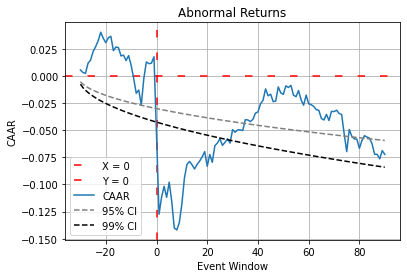

In [1063]:

plt.axvline(x=0, color='r', linestyle=(0,(5,10)), label='X = 0')
plt.axhline(y=0, color='r', linestyle=(0,(5,10)), label='Y = 0')
# plt.scatter(aar.index.values,aar['AAR'],s=30,label='AAR')
# plt.plot(aar.index.values,aar['AAR'],linestyle='solid',linewidth=3)
# plt.scatter(aar.index.values,caar['CAAR'],s=30,label='CAAR')
plt.plot(caar.index.values,caar['CAAR'],linewidth=1.5, label='CAAR')
plt.plot(caar.index.values,caar['95% CI'],linewidth=1.5, linestyle='dashed', color='grey', label='95% CI')
plt.plot(caar.index.values,caar['99% CI'],linewidth=1.5, linestyle='dashed', color='black', label='99% CI')
plt.legend(fancybox=True)
plt.xlabel("Event Window")
plt.ylabel("CAAR")
plt.title('Abnormal Returns')
plt.grid()
plt.show()